In [1]:
import pandas as pd
df=pd.read_csv("C:\\Users\\ashwi\\OneDrive\\Desktop\\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Load and Explore

In [3]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Cleaning

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df['Age']=df["Age"].fillna(df["Age"].mean())

In [14]:
df['Embarked']=df["Embarked"].fillna(df["Embarked"].mode()[0])

In [16]:
df.drop('Cabin',axis=1,inplace=True)

In [22]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [26]:
df.duplicated().sum()

0

In [32]:
import numpy as np
num=df.select_dtypes(include=np.number)
for i in num:
    q1=df[i].quantile(0.25)
    q2=df[i].quantile(0.50)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
lw=q1-1.5*iqr
uw=q3+1.5*iqr
outliers=((df[i]<lw)&(df[i]>uw))
outliers.sum()

0

# Data Analysis

In [76]:
### Total passengers
df['PassengerId'].sum()

397386

In [78]:
# Gender distribution
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [80]:
# Average Age
df["Age"].mean()

29.69911764705882

# Data Visualisation
### Univariate Analysis

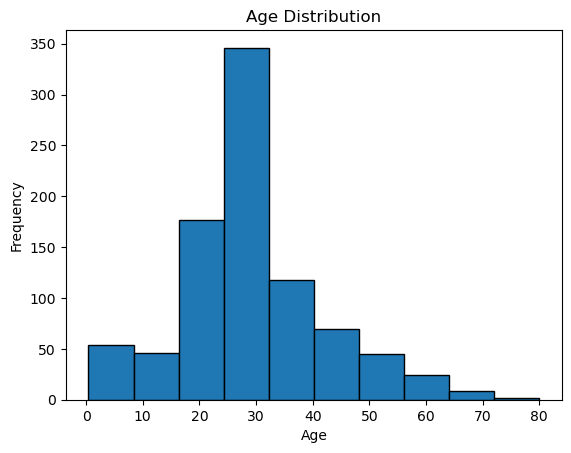

In [89]:
import matplotlib.pyplot as plt
plt.hist(df['Age'], bins=10,edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

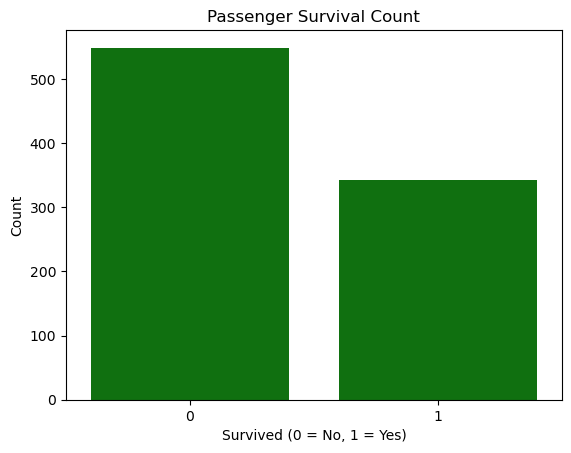

In [48]:
import seaborn as sns
sns.countplot(x=df['Survived'],color="green")
plt.title("Passenger Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

### Bivariate Analysis with Survival

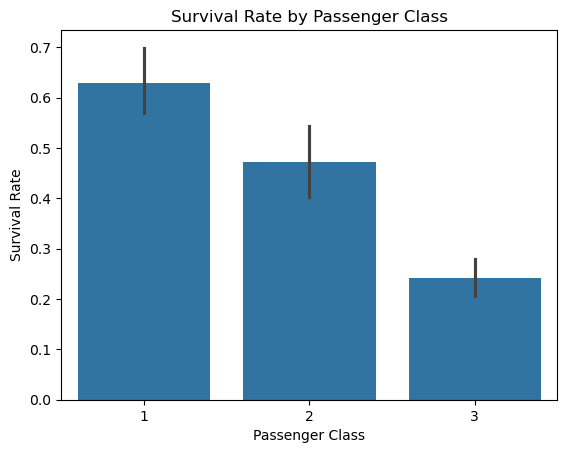

In [83]:
sns.barplot(x=df['Pclass'], y=df['Survived'])
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

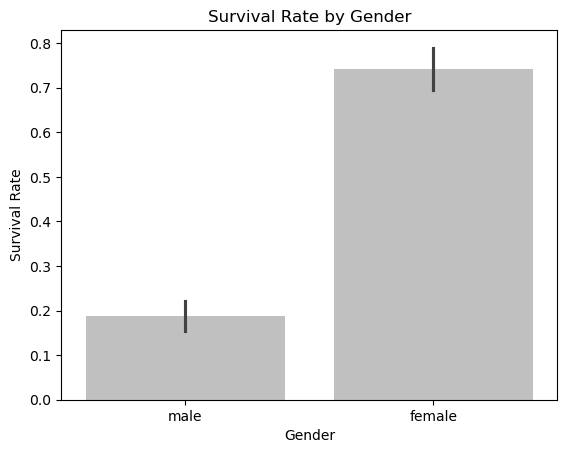

In [69]:
sns.barplot(x=df['Sex'], y=df['Survived'],color="silver")
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()

# Correlation Matrix

In [64]:
a=df.corr(numeric_only=True)

<Axes: >

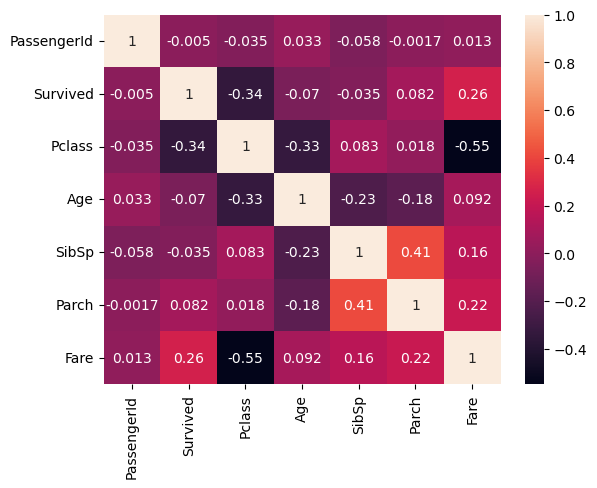

In [66]:
sns.heatmap(a,annot=True)

# Top Insights from the Titanic Dataset

### 1 The average age of passengers is around 29 years
### 2 Most of the passengers died in the incident
### 3 Passengers in 1st class had the highest survival rate.
### 4 Female passengers had a significantly higher survival rate compared to males.


